In [1]:
import numpy as np

In [246]:
# Create a linear regression class

class LinReg:
    # Take in variables
    def __init__(self, max_iterations=1000, delta=0.001, alpha=0.005):
        self.max_iterations = max_iterations
        self.delta = delta
        self.alpha = alpha
        
    def fit(self, X, y, method):
        self.X = X
        self.y = y
        self.method = method
        
        num_samples = self.X.shape[0]
        ones_column = np.ones(num_samples)  
        X = np.column_stack((ones_column, self.X))        
        X_t = X.transpose()
        
        if method == "analytic":
            XtX = np.matmul(X_t, X)
            XtX_inv = np.linalg.inv(XtX)
            self.theta_anal = np.matmul(np.matmul(XtX_inv , X_t), self.y)
            
        elif method == "iterative":
            cost_hist = np.array([])
            theta_guess = np.ones(X.shape[1])
            for i in range(self.max_iterations):
                hypothesis = X.dot(theta_guess)
                temp_obj = np.multiply(X_t, (hypothesis-self.y))
                dJdTheta = temp_obj.sum(axis=1) / num_samples
                theta_guess = theta_guess - self.alpha*dJdTheta
                
                cost_fun = (np.square(hypothesis-self.y)).sum() / (2*num_samples)
                cost_hist = np.append(cost_hist, cost_fun)
                if all(abs(a) < self.delta for a in dJdTheta):
                    print(dJdTheta)
                    break     
            self.theta_iter = theta_guess
            self.cost_hist = cost_hist
        
        else:
            print("Input either \"analytic\" or \"iterative\" for method")
            
    def predict(X):
        pass
        # Have it return a matrix of y's

In [247]:
# Create a test case generator
def generate_linear_dataset(beta1, beta2, n, std_dev):
    X1 = np.random.random(n) * 100
    X2 = np.random.random(n) * 100
    eps = np.random.randn(n) * std_dev
    y = X1*beta1 + X2*beta2 + eps
    X = np.column_stack((X1, X2))
    return X, y

In [248]:
X, y = generate_linear_dataset(7, 4, 100, 1.6)

In [270]:
test1 = LinReg(max_iterations=15, alpha=0.0001)
test1.fit(X, y, "analytic")

In [271]:
test1.theta_anal

array([-0.27212392,  7.00191517,  4.0052596 ])

In [272]:
test1.fit(X, y, "iterative")

In [273]:
test1.theta_iter

array([ 1.07925112,  6.63181046,  4.35752851])

In [274]:
import matplotlib.pyplot as plt

In [275]:
x_range = list(range(1, test1.cost_hist.shape[0]+1))
plt.fill_between(x_range, test1.cost_hist)
plt.xlabel('iteration')
plt.ylabel('cost function')

Text(0,0.5,'cost function')

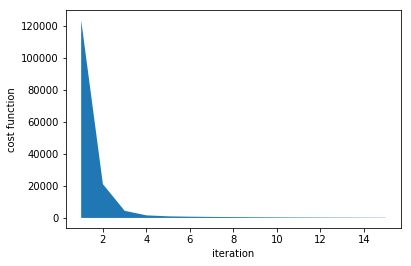

In [276]:
plt.show()